## **Data Loading and Initial Inspection of Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
file_path = 'parkinsons_updrs.csv'
df = pd.read_csv(file_path)
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [5]:
df['subject#'].nunique()

42

## **Patient-Level Aggregation (Baseline Dataset)**

To satisfy the independence assumption for linear regression, repeated recordings were averaged at the patient level.

In [6]:
df_patient = (
    df.groupby('subject#')
      .mean(numeric_only=True)
      .reset_index()
)

df_patient.shape

(42, 22)

In [7]:
df_patient.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72.0,0.0,89.176971,31.898933,40.733201,0.004284,0.000024,0.001885,0.002006,...,0.210832,0.010313,0.011593,0.017699,0.030940,0.018076,25.453027,0.469118,0.558249,0.195757
1,2,58.0,0.0,90.364266,13.812538,16.284014,0.006721,0.000051,0.003441,0.003569,...,0.379759,0.022787,0.025217,0.030718,0.068360,0.025089,20.079048,0.520451,0.755966,0.225953
2,3,57.0,0.0,87.829658,27.124785,33.359701,0.003318,0.000020,0.001588,0.001797,...,0.151090,0.008125,0.009133,0.012138,0.024375,0.010999,25.687417,0.429377,0.568296,0.153136
3,4,74.0,0.0,91.029428,15.790825,23.587321,0.004967,0.000039,0.002306,0.002590,...,0.476175,0.029387,0.031707,0.039452,0.088160,0.031695,19.723737,0.647512,0.632330,0.200013
4,5,75.0,0.0,85.623752,31.632603,41.853987,0.004937,0.000043,0.002248,0.002641,...,0.335314,0.019925,0.022598,0.029159,0.059775,0.023780,20.658096,0.582019,0.638004,0.225955


In [8]:
df_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       42 non-null     int64  
 1   age            42 non-null     float64
 2   sex            42 non-null     float64
 3   test_time      42 non-null     float64
 4   motor_UPDRS    42 non-null     float64
 5   total_UPDRS    42 non-null     float64
 6   Jitter(%)      42 non-null     float64
 7   Jitter(Abs)    42 non-null     float64
 8   Jitter:RAP     42 non-null     float64
 9   Jitter:PPQ5    42 non-null     float64
 10  Jitter:DDP     42 non-null     float64
 11  Shimmer        42 non-null     float64
 12  Shimmer(dB)    42 non-null     float64
 13  Shimmer:APQ3   42 non-null     float64
 14  Shimmer:APQ5   42 non-null     float64
 15  Shimmer:APQ11  42 non-null     float64
 16  Shimmer:DDA    42 non-null     float64
 17  NHR            42 non-null     float64
 18  HNR         

## **Exploratory Data Analysis**

Summary statistics and correlations are examined to understand the distribution of disease severity and its relationship with demographic and voice features.

In [9]:
df_patient = df_patient.drop(columns=['subject#'])

In [10]:
df_patient['total_UPDRS'].describe()

count    42.000000
mean     28.537761
std      10.443513
min       7.300971
25%      20.626375
50%      27.322406
75%      34.505466
max      54.253109
Name: total_UPDRS, dtype: float64

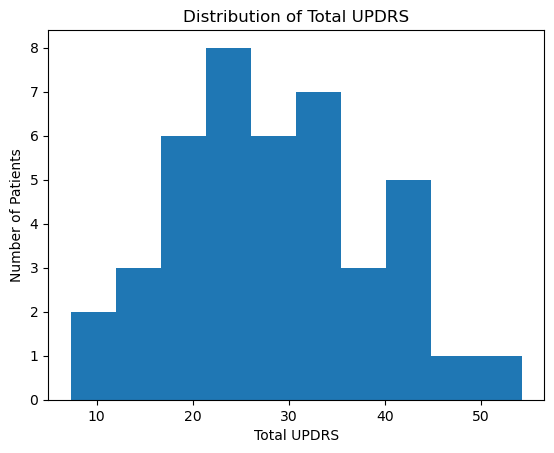

In [11]:
plt.hist(df_patient['total_UPDRS'], bins=10)
plt.xlabel("Total UPDRS")
plt.ylabel("Number of Patients")
plt.title("Distribution of Total UPDRS")
plt.show()

In [12]:
corr_with_updrs = df_patient.corr(numeric_only=True)['total_UPDRS']
corr_with_updrs.sort_values(ascending=False)

total_UPDRS      1.000000
motor_UPDRS      0.950280
age              0.334764
RPDE             0.277052
PPE              0.247779
Shimmer:APQ11    0.196247
Shimmer(dB)      0.161098
Jitter(%)        0.159445
Shimmer          0.153024
Jitter:DDP       0.150366
Jitter:RAP       0.150347
Shimmer:DDA      0.146023
Shimmer:APQ3     0.146020
Jitter(Abs)      0.140860
Shimmer:APQ5     0.140557
Jitter:PPQ5      0.123734
NHR              0.104837
test_time       -0.089201
sex             -0.122419
DFA             -0.123420
HNR             -0.254166
Name: total_UPDRS, dtype: float64

In [13]:
corr_matrix = df_patient.corr(numeric_only=True)
corr_matrix

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
age,1.000000,-0.064549,0.133709,0.298982,0.334764,0.055375,0.075591,0.036285,0.033397,0.036294,...,0.157692,0.154665,0.129722,0.193419,0.154668,0.017992,-0.150907,0.135006,-0.084598,0.182906
sex,-0.064549,1.000000,-0.070086,-0.056976,-0.122419,0.071129,-0.247747,0.124511,0.128117,0.124476,...,0.068260,0.055973,0.079905,0.023993,0.055974,0.214789,0.015510,-0.243198,-0.203558,-0.163616
test_time,0.133709,-0.070086,1.000000,-0.043527,-0.089201,-0.027940,-0.012126,-0.058913,-0.076000,-0.058875,...,-0.043971,-0.061671,-0.051689,0.027285,-0.061667,-0.167564,0.098105,-0.130064,0.306107,0.087133
motor_UPDRS,0.298982,-0.056976,-0.043527,1.000000,0.950280,0.181275,0.119782,0.168658,0.147917,0.168684,...,0.181015,0.158008,0.157423,0.224141,0.158010,0.126266,-0.251115,0.238430,-0.122543,0.260960
total_UPDRS,0.334764,-0.122419,-0.089201,0.950280,1.000000,0.159445,0.140860,0.150347,0.123734,0.150366,...,0.161098,0.146020,0.140557,0.196247,0.146023,0.104837,-0.254166,0.277052,-0.123420,0.247779
Jitter(%),0.055375,0.071129,-0.027940,0.181275,0.159445,1.000000,0.893906,0.989010,0.979310,0.989010,...,0.865875,0.821781,0.851562,0.856602,0.821781,0.876876,-0.807634,0.615878,0.244035,0.839120
Jitter(Abs),0.075591,-0.247747,-0.012126,0.119782,0.140860,0.893906,1.000000,0.871789,0.826922,0.871799,...,0.722603,0.694815,0.706905,0.740327,0.694815,0.666439,-0.776421,0.754123,0.411760,0.887537
Jitter:RAP,0.036285,0.124511,-0.058913,0.168658,0.150347,0.989010,0.871789,1.000000,0.966013,1.000000,...,0.843695,0.809519,0.828915,0.816398,0.809520,0.866254,-0.785965,0.595842,0.233527,0.804481
Jitter:PPQ5,0.033397,0.128117,-0.076000,0.147917,0.123734,0.979310,0.826922,0.966013,1.000000,0.966007,...,0.905075,0.856628,0.899686,0.885902,0.856628,0.945828,-0.796221,0.557338,0.153273,0.757329
Jitter:DDP,0.036294,0.124476,-0.058875,0.168684,0.150366,0.989010,0.871799,1.000000,0.966007,1.000000,...,0.843704,0.809532,0.828923,0.816410,0.809533,0.866240,-0.785978,0.595832,0.233548,0.804493


We observe high correlations here, which suggests we might have multicollinearity issues to check later.

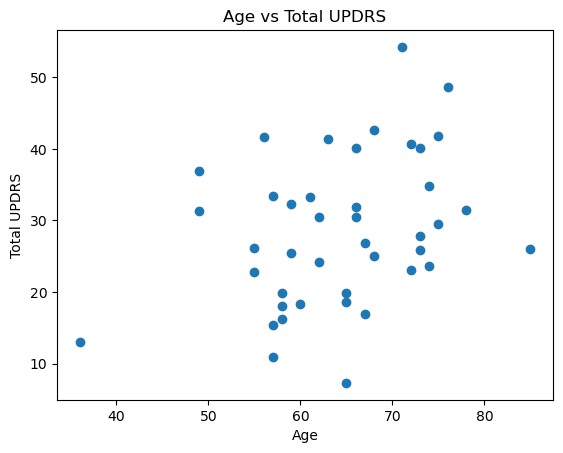

In [14]:
plt.scatter(
    df_patient['age'],
    df_patient['total_UPDRS']
)
plt.xlabel("Age")
plt.ylabel("Total UPDRS")
plt.title("Age vs Total UPDRS")
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_29200\4292131720.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


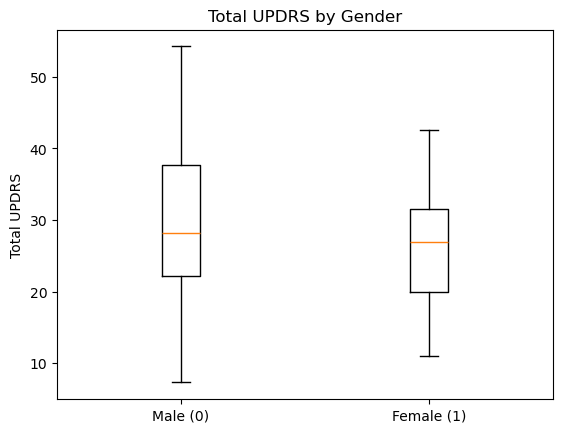

In [15]:
plt.boxplot(
    [df_patient[df_patient['sex'] == 0]['total_UPDRS'],
     df_patient[df_patient['sex'] == 1]['total_UPDRS']],
    labels=['Male (0)', 'Female (1)']
)
plt.ylabel("Total UPDRS")
plt.title("Total UPDRS by Gender")
plt.show()

## **Baseline Model Preparation**

In [16]:
df_model = df_patient.drop(columns=['motor_UPDRS'])
df_model.columns

Index(['age', 'sex', 'test_time', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)',
       'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'Shimmer:APQ11', 'Shimmer:DDA', 'NHR',
       'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

The motor_UPDRS variable is removed to avoid redundancy with the total_UPDRS outcome.

In [17]:
df_model.head()

,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72.0,0.0,89.176971,40.733201,0.004284,0.000024,0.001885,0.002006,0.005653,0.021463,0.210832,0.010313,0.011593,0.017699,0.030940,0.018076,25.453027,0.469118,0.558249,0.195757
1,58.0,0.0,90.364266,16.284014,0.006721,0.000051,0.003441,0.003569,0.010323,0.041964,0.379759,0.022787,0.025217,0.030718,0.068360,0.025089,20.079048,0.520451,0.755966,0.225953
2,57.0,0.0,87.829658,33.359701,0.003318,0.000020,0.001588,0.001797,0.004766,0.015841,0.151090,0.008125,0.009133,0.012138,0.024375,0.010999,25.687417,0.429377,0.568296,0.153136
3,74.0,0.0,91.029428,23.587321,0.004967,0.000039,0.002306,0.002590,0.006917,0.053324,0.476175,0.029387,0.031707,0.039452,0.088160,0.031695,19.723737,0.647512,0.632330,0.200013
4,75.0,0.0,85.623752,41.853987,0.004937,0.000043,0.002248,0.002641,0.006743,0.036913,0.335314,0.019925,0.022598,0.029159,0.059775,0.023780,20.658096,0.582019,0.638004,0.225955


## **Patient-Level Linear Regression (Baseline OLS)**

In [18]:
X = df_model.drop(columns=['total_UPDRS', 'subject#'], errors='ignore')
y = df_model['total_UPDRS']
X = sm.add_constant(X)
model_full = sm.OLS(y, X).fit()
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.041
Date:                Wed, 17 Dec 2025   Prob (F-statistic):              0.460
Time:                        19:05:36   Log-Likelihood:                -144.15
No. Observations:                  42   AIC:                             328.3
Df Residuals:                      22   BIC:                             363.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            38.3340     83.911      0.457

Coefficients are massively large, detecting strong multicollinearity.

## **Multicollinearity Diagnosis (VIF Analysis)**

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF Scores (The Evidence for Dropping Columns):")
print(vif_data.sort_values(by="VIF", ascending=False))

VIF Scores (The Evidence for Dropping Columns):
         Variable           VIF
14    Shimmer:DDA  3.185232e+09
11   Shimmer:APQ3  3.185003e+09
6      Jitter:RAP  6.140895e+07
8      Jitter:DDP  6.137933e+07
9         Shimmer  5.866521e+03
0           const  2.763057e+03
12   Shimmer:APQ5  1.500538e+03
10    Shimmer(dB)  1.087144e+03
13  Shimmer:APQ11  7.719849e+02
7     Jitter:PPQ5  6.919692e+02
4       Jitter(%)  5.012674e+02
15            NHR  1.153421e+02
5     Jitter(Abs)  2.519892e+01
19            PPE  2.126571e+01
16            HNR  2.031925e+01
17           RPDE  6.266786e+00
18            DFA  4.651190e+00
2             sex  2.892267e+00
3       test_time  1.951236e+00
1             age  1.730137e+00


Using VIF values to determine which variables to drop

In [20]:
cols_to_drop = [
    'Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',  # Keep Jitter:Abs
    'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ11', 'Shimmer:DDA' # Keep Shimmer:APQ5
]

df_refined = df_model.drop(columns=cols_to_drop, errors='ignore')

## **Model Refinement via VIF and Backward Elimination**

Highly collinear predictors are iteratively removed using VIF thresholds, followed by backward elimination based on statistical significance.

In [21]:
X_refined = df_refined.drop(columns=['total_UPDRS', 'subject#'], errors='ignore')
y_refined = df_refined['total_UPDRS']

X_refined = sm.add_constant(X_refined)

vif_data_refined = pd.DataFrame()
vif_data_refined["Variable"] = X_refined.columns
vif_data_refined["VIF"] = [variance_inflation_factor(X_refined.values, i) for i in range(X_refined.shape[1])]

print("Refined VIF Scores (Goal: All < 10):")
print(vif_data_refined.sort_values(by="VIF", ascending=False))

Refined VIF Scores (Goal: All < 10):
        Variable          VIF
0          const  1862.198812
5   Shimmer:APQ5    16.376289
6            NHR    14.708225
7            HNR    12.501572
4    Jitter(Abs)    12.032674
10           PPE     8.341166
8           RPDE     4.214249
9            DFA     2.517176
2            sex     1.822520
3      test_time     1.356948
1            age     1.247753


## **Feature Removal Based on VIF Threshold**

Dropping NHR

In [22]:
df_final = df_refined.drop(columns=['NHR'], errors='ignore')

X_final = df_final.drop(columns=['total_UPDRS', 'subject#'], errors='ignore')
y_final = df_final['total_UPDRS']

X_final = sm.add_constant(X_final)

## **Recalculation of VIF After Feature Removal**

Recalculating VIF to verify

In [23]:
vif_data_final = pd.DataFrame()
vif_data_final["Variable"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

print("Final VIF Scores (Goal: All < 10):")
print(vif_data_final.sort_values(by="VIF", ascending=False))

Final VIF Scores (Goal: All < 10):
       Variable          VIF
0         const  1830.724798
6           HNR    12.230257
4   Jitter(Abs)     8.494466
9           PPE     8.084106
5  Shimmer:APQ5     7.025490
7          RPDE     4.200811
8           DFA     1.816850
3     test_time     1.337887
2           sex     1.293180
1           age     1.164667


## **Final Predictor Set After Multicollinearity Control**

Drop HNR

In [24]:
df_final_clean = df_final.drop(columns=['HNR'], errors='ignore')
X_clean = df_final_clean.drop(columns=['total_UPDRS', 'subject#'], errors='ignore')
y_clean = df_final_clean['total_UPDRS']
X_clean = sm.add_constant(X_clean)

## **Final VIF Verification**

In [25]:
vif_data_clean = pd.DataFrame()
vif_data_clean["Variable"] = X_clean.columns
vif_data_clean["VIF"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
print("--- Final VIF Scores (Must be < 10) ---")
print(vif_data_clean.sort_values(by="VIF", ascending=False))

--- Final VIF Scores (Must be < 10) ---
       Variable         VIF
0         const  392.515115
4   Jitter(Abs)    7.192037
8           PPE    5.940421
5  Shimmer:APQ5    2.730137
6          RPDE    2.532850
7           DFA    1.701005
2           sex    1.283640
3     test_time    1.245533
1           age    1.164215


## **Final OLS Model Fitting**

In [26]:
final_model = sm.OLS(y_clean, X_clean).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.481
Date:                Wed, 17 Dec 2025   Prob (F-statistic):              0.202
Time:                        19:05:37   Log-Likelihood:                -151.18
No. Observations:                  42   AIC:                             320.4
Df Residuals:                      33   BIC:                             336.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           18.9687     30.527      0.621   

Model is quite noisy, as p value of 0.202 > 0.05, indicating several weak predictors. Must perform stepwise selection -> backward elimination

## **Stepwise Backward Elimination Based on Statistical Significance**

In [27]:
#Backward Elimination based on P-values
def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    while len(features) > 0:
        features_with_const = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_const).fit().pvalues[1:]

        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            print(f"Dropping: {excluded_feature} (p-value={max_p_value:.4f})")
            features.remove(excluded_feature)
        else:
            break

    return features

print("Starting Stepwise Backward Elimination")

X_input = df_final_clean.drop(columns=['total_UPDRS', 'subject#'], errors='ignore')
y_input = df_final_clean['total_UPDRS']

selected_features = backward_elimination(X_input, y_input)

print(f"\nBest Features Selected: {selected_features}")

Starting Stepwise Backward Elimination
Dropping: Shimmer:APQ5 (p-value=0.7580)
Dropping: test_time (p-value=0.5919)
Dropping: sex (p-value=0.4207)
Dropping: Jitter(Abs) (p-value=0.2093)
Dropping: PPE (p-value=0.4267)
Dropping: DFA (p-value=0.2715)
Dropping: RPDE (p-value=0.1175)

Best Features Selected: ['age']


## **Optimized Regression Model**

In [28]:
X_selected = sm.add_constant(X_input[selected_features])
final_model_optimized = sm.OLS(y_input, X_selected).fit()

print("\n" + "="*40)
print("OPTIMIZED MODEL RESULTS")
print("="*40)
print(final_model_optimized.summary())


OPTIMIZED MODEL RESULTS
                            OLS Regression Results                            
Dep. Variable:            total_UPDRS   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     5.048
Date:                Wed, 17 Dec 2025   Prob (F-statistic):             0.0302
Time:                        19:05:38   Log-Likelihood:                -155.12
No. Observations:                  42   AIC:                             314.2
Df Residuals:                      40   BIC:                             317.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1679     1

## **Visualization: Effect of Age on Parkinson’s Severity**

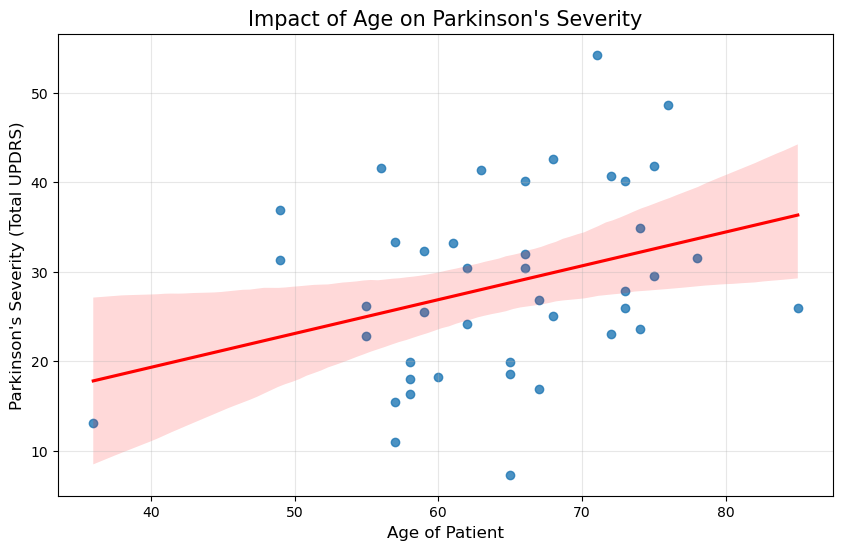

In [29]:
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='total_UPDRS', data=df_final_clean, line_kws={"color": "red"})

plt.title('Impact of Age on Parkinson\'s Severity', fontsize=15)
plt.xlabel('Age of Patient', fontsize=12)
plt.ylabel('Parkinson\'s Severity (Total UPDRS)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## **Mixed-Effects Modeling**

In [30]:
df_full = pd.read_csv('parkinsons_updrs.csv')

cols_to_drop = [
    'motor_UPDRS',
    'Jitter(%)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
    'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ11', 'Shimmer:DDA',
    'NHR', 'HNR'
]
df_full_clean = df_full.drop(columns=cols_to_drop, errors='ignore')

df_full_clean = df_full_clean.rename(columns={'subject#': 'subject_id'})

df_full_clean.columns = (df_full_clean.columns
                        .str.replace('(', '_', regex=False)
                        .str.replace(')', '', regex=False)
                        .str.replace(':', '_', regex=False))

predictors = df_full_clean.columns.drop(['subject_id', 'total_UPDRS', 'test_time'])
formula = "total_UPDRS ~ " + " + ".join(predictors)

print(f"Formula: {formula}")

model_mixed = smf.mixedlm(formula, df_full_clean, groups=df_full_clean["subject_id"])
result_mixed = model_mixed.fit()

print(result_mixed.summary())

Formula: total_UPDRS ~ age + sex + Jitter_Abs + Shimmer_APQ5 + RPDE + DFA + PPE
           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  total_UPDRS
No. Observations:  5875     Method:              REML       
No. Groups:        42       Scale:               7.6436     
Min. group size:   101      Log-Likelihood:      -14449.4056
Max. group size:   168      Converged:           Yes        
Mean group size:   139.9                                    
------------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
------------------------------------------------------------
Intercept       7.297   11.216  0.651 0.515 -14.686   29.280
age             0.373    0.170  2.193 0.028   0.040    0.706
sex            -2.233    3.293 -0.678 0.498  -8.688    4.222
Jitter_Abs   4670.689 2020.782  2.311 0.021 710.029 8631.349
Shimmer_APQ5  -12.057    4.121 -2.926 0.003 -20.135   -3.980
RPDE           -1

In [33]:
model_comparison = pd.DataFrame({
    "Model": [
        "OLS (After VIF)",
        "OLS (Backward Elimination)",
        "Mixed Linear Model"
    ],
    "Num_Predictors": [
        int(final_model.df_model),
        int(final_model_optimized.df_model),
        len(result_refined.fe_params) - 1 
    ],
    "R_squared / Pseudo_R2": [
        final_model.rsquared,
        final_model_optimized.rsquared,
        None  # MixedLM does not have classical R²
    ],
    "AIC": [
        final_model.aic,
        final_model_optimized.aic,
        result_refined.aic
    ],
    "BIC": [
        final_model.bic,
        final_model_optimized.bic,
        result_refined.bic
    ],
    "Accounts_for_Subject_Effects": [
        "No",
        "No",
        "Yes"
    ]
})

model_comparison

,Model,Num_Predictors,R_squared / Pseudo_R2,AIC,BIC,Accounts_for_Subject_Effects
0,OLS (After VIF),8,0.264155,320.358218,335.997245,No
1,OLS (Backward Elimination),1,0.112067,314.249082,317.724421,No
2,Mixed Linear Model,4,NaN,NaN,NaN,Yes


## **Mixed-Effects Model Refinement and Predictor Selection**

In [32]:
formula_refined = "total_UPDRS ~ age + Jitter_Abs + Shimmer_APQ5 + RPDE"

print(f"Final Formula: {formula_refined}")

model_refined = smf.mixedlm(formula_refined, df_full_clean, groups=df_full_clean["subject_id"])
result_refined = model_refined.fit()

print(result_refined.summary())

print("\n--- P-Values for Final Predictors ---")
print(result_refined.pvalues)

Final Formula: total_UPDRS ~ age + Jitter_Abs + Shimmer_APQ5 + RPDE
           Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  total_UPDRS
No. Observations:  5875     Method:              REML       
No. Groups:        42       Scale:               7.6455     
Min. group size:   101      Log-Likelihood:      -14455.2990
Max. group size:   168      Converged:           Yes        
Mean group size:   139.9                                    
------------------------------------------------------------
              Coef.   Std.Err.   z    P>|z|  [0.025  0.975] 
------------------------------------------------------------
Intercept       4.735   10.981  0.431 0.666 -16.788   26.257
age             0.381    0.169  2.260 0.024   0.051    0.712
Jitter_Abs   3450.392 1653.170  2.087 0.037 210.239 6690.545
Shimmer_APQ5  -12.940    4.073 -3.177 0.001 -20.924   -4.956
RPDE           -1.200    0.556 -2.159 0.031  -2.289   -0.111
Group Var      99.635    8.07

## **Final Mixed-Effects Model Results**

Preview of Subject Effects:
    Subject_Effect
18      -21.583821
22      -14.953442
20      -12.693588
40      -10.382419
27      -10.304575


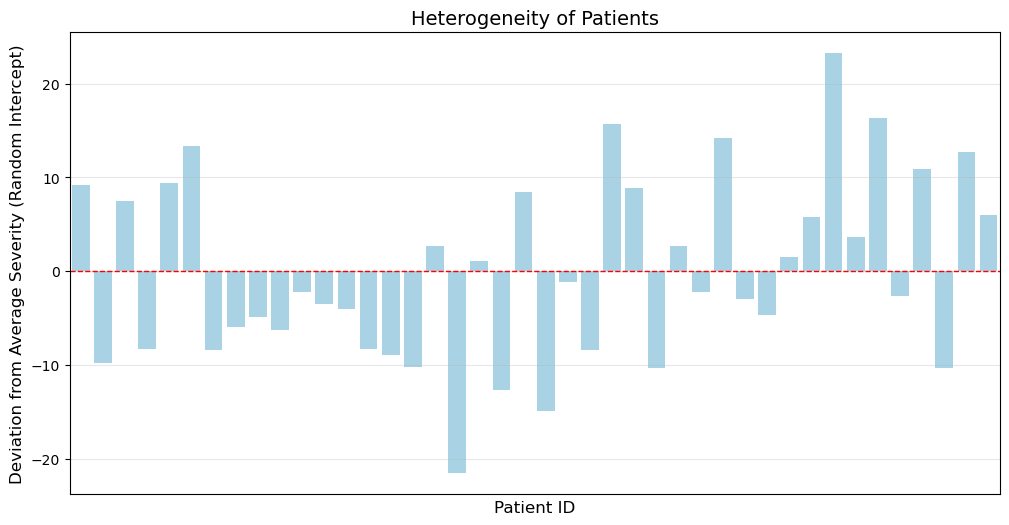

In [34]:
random_effects = result_refined.random_effects
re_data = {k: v.iloc[0] for k, v in random_effects.items()}

re_df = pd.DataFrame.from_dict(re_data, orient='index', columns=['Subject_Effect'])
re_df = re_df.sort_values('Subject_Effect')

print("Preview of Subject Effects:")
print(re_df.head())

plt.figure(figsize=(12, 6))
sns.barplot(x=re_df.index, y=re_df['Subject_Effect'], color='skyblue', alpha=0.8)
plt.axhline(0, color='red', linestyle='--', linewidth=1)

plt.title('Heterogeneity of Patients', fontsize=14)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Deviation from Average Severity (Random Intercept)', fontsize=12)
plt.xticks([]) # Hide messy x-labels
plt.grid(axis='y', alpha=0.3)
plt.show()

## **Random Effects Diagnostics and Subject Heterogeneity**

In [35]:
group_variance = result_refined.cov_re.iloc[0, 0]   
residual_variance = result_refined.scale            

# ICC calculation
icc = group_variance / (group_variance + residual_variance)

print(f"Intra-Class Correlation (ICC): {icc:.3f}")


Intra-Class Correlation (ICC): 0.929


In [36]:
from scipy import stats

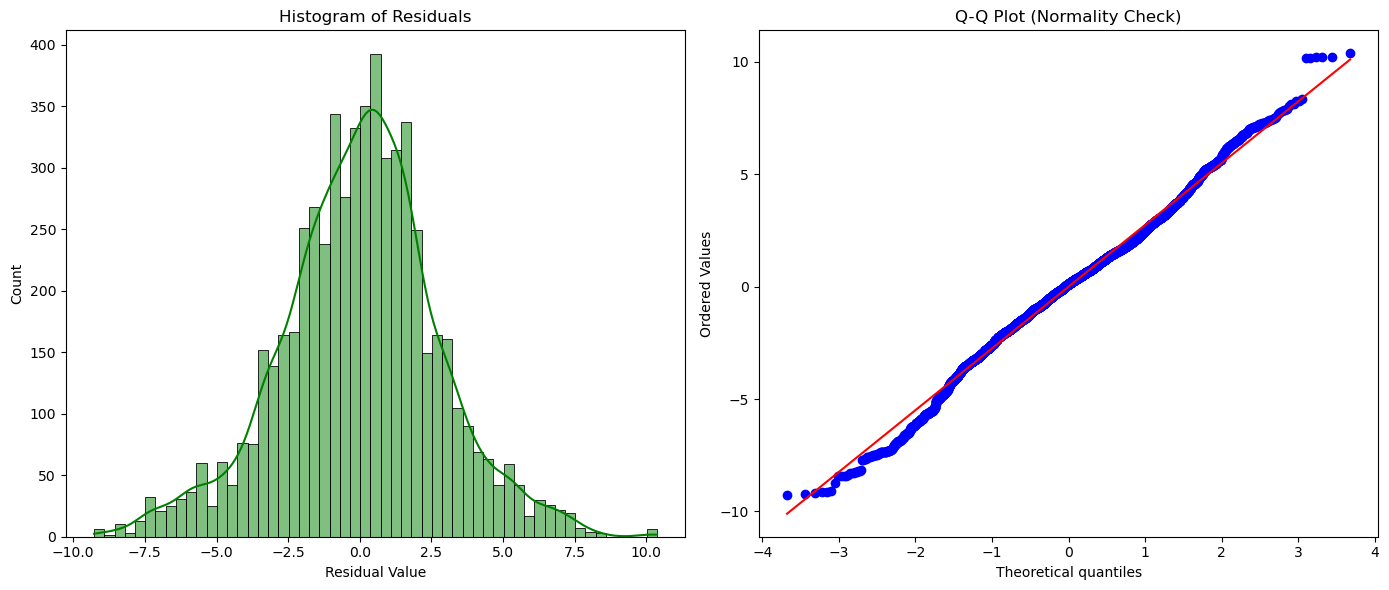

Shapiro-Wilk P-Value: 0.0000


C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5875.
  res = hypotest_fun_out(*samples, **kwds)


In [37]:
residuals = result_refined.resid

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(residuals, kde=True, ax=ax[0], color='green')
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residual Value')

stats.probplot(residuals, dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot (Normality Check)')
ax[1].get_lines()[0].set_color('blue') # dots
ax[1].get_lines()[1].set_color('red') # line

plt.tight_layout()
plt.show()

shapiro_p = stats.shapiro(residuals).pvalue
print(f"Shapiro-Wilk P-Value: {shapiro_p:.4f}")

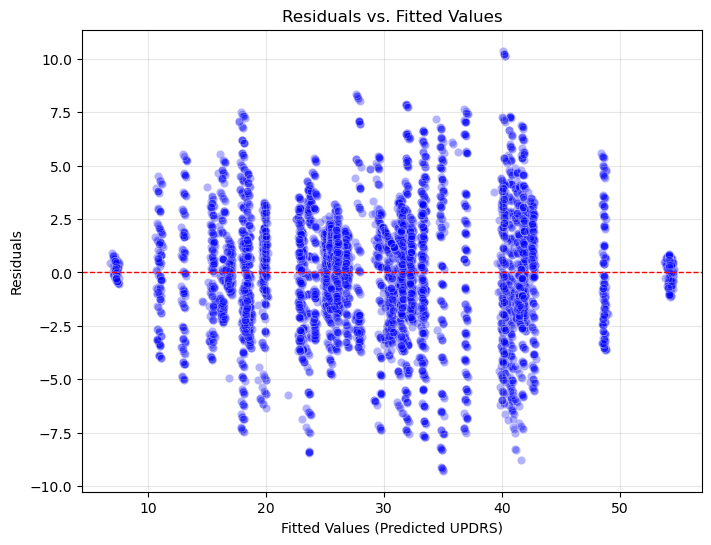

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

fitted_vals = result_refined.fittedvalues
residuals = result_refined.resid

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_vals, y=residuals, alpha=0.3, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted UPDRS)')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.show()